<a href="https://colab.research.google.com/github/vishnu-priya007/ML_Project/blob/main/ML_PROJECT_weatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.shape

(21690, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21690 entries, 0 to 21689
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21690 non-null  object 
 1   Location       21690 non-null  object 
 2   MinTemp        21242 non-null  float64
 3   MaxTemp        21362 non-null  float64
 4   Rainfall       21188 non-null  float64
 5   Evaporation    7311 non-null   float64
 6   Sunshine       4667 non-null   float64
 7   WindGustDir    18006 non-null  object 
 8   WindGustSpeed  18008 non-null  float64
 9   WindDir9am     18709 non-null  object 
 10  WindDir3pm     19817 non-null  object 
 11  WindSpeed9am   20979 non-null  float64
 12  WindSpeed3pm   20300 non-null  float64
 13  Humidity9am    21198 non-null  float64
 14  Humidity3pm    20504 non-null  float64
 15  Pressure9am    18100 non-null  float64
 16  Pressure3pm    18104 non-null  float64
 17  Cloud9am       11952 non-null  float64
 18  Cloud3

In [4]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

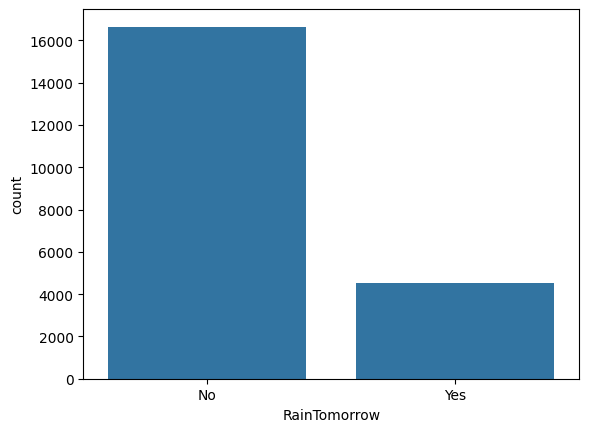

In [5]:
sns.countplot(data=df,x='RainTomorrow')
plt.show()

In [6]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,448
MaxTemp,328
Rainfall,502
Evaporation,14379
Sunshine,17023
WindGustDir,3684
WindGustSpeed,3682
WindDir9am,2981
